In [199]:
import numpy as np 
import pandas as pd 
import scipy as sp 
from scipy import stats 
import matplotlib.pyplot as plt  
import seaborn as sns

Here's the data we'll be working with.

<Axes: xlabel='x', ylabel='y'>

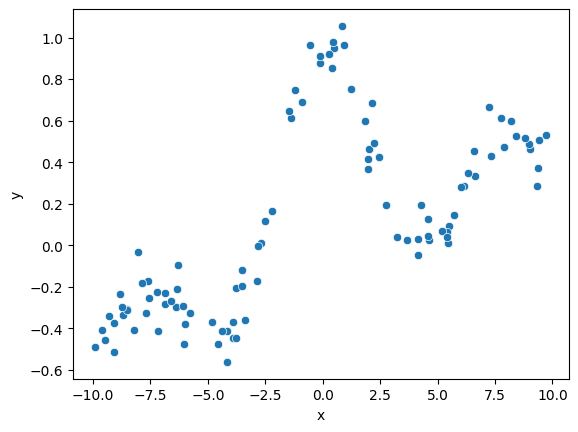

In [200]:
data = pd.read_csv('data.csv', header=None)
data.columns = ['x', 'y']
sns.scatterplot(data=data, x='x', y='y')

In [201]:
data.shape

(100, 2)

We're going to fit a function of the form $H(x) = w_1\phi_1(x)+w_2\phi_2(x)+\dots+w_{50}\phi_{50}(x)$, where each $\phi_i(x)$ is a Gaussian basis function. The 50 Gaussian basis functions are equally-spaced, with the first at $\mu_1 = -10$ and the last at $\mu_{50} = 10$. The width of each Gaussian is $\sigma = 1$. 

In [270]:
# Gaussian function 
def gauss(x, mu, sigma): 
    return np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))


def ols_gauss_basis_50_fit(data):
    '''
    This function fits a linear predictor with 50 gaussian basis functions.
    It calculates the vector of basis functions given the data. Next, it finds
    the optimal weight vector which minimizes the risk for OLS regression.
    '''
    # Fit our linear predictor.
    sigma = 1
    n = data.shape[0]
    # Create the design matrix
    phi = np.array(
        [gauss(data.x, mu_i, sigma) for mu_i in np.arange(-10, 10, 0.4)]).T
    # Calculate the p
    w = np.matmul(
        np.linalg.inv(np.matmul(phi.T, phi)), 
        np.matmul(phi.T, data.y))
    return w


def ridge_gauss_basis_50_fit(data, lambd=0.01):
    '''
    This function fits a linear predictor with 50 gaussian basis functions.
    It calculates the vector of basis functions given the data. Next, it finds
    the optimal weight vector which minimizes the risk for ridge regression.
    '''
    # Fit our linear predictor.
    sigma = 1
    n = data.shape[0]
    # Create the design matrix
    phi = np.array(
        [gauss(data.x, mu_i, sigma) for mu_i in np.arange(-10, 10, 0.4)]).T
    # Calculate the p
    w = np.matmul(
        np.linalg.inv(np.matmul(phi.T, phi) + n * lambd * np.identity(50)), 
        np.matmul(phi.T, data.y))
    return w


Let's try using OLS with our basis function to run predictions over our data.

w: [-2.26117139e+10  1.51527855e+11 -5.43145403e+11  1.38267374e+12
 -2.79963319e+12  4.78657553e+12 -7.16279445e+12  9.60161413e+12
 -1.17117488e+13  1.31421276e+13 -1.36720744e+13  1.32567092e+13
 -1.20172673e+13  1.01886186e+13 -8.05053424e+12  5.86864802e+12
 -3.85832491e+12  2.16990277e+12 -8.86325806e+11  2.60662694e+10
  4.49620408e+11 -6.22477456e+11  5.95505225e+11 -4.68374808e+11
  3.17869227e+11 -1.89300408e+11  9.93483894e+10 -4.58296075e+10
  1.84413065e+10 -6.39527837e+09  1.88218529e+09 -4.64331471e+08
  9.81107397e+07 -2.07753360e+07  6.03021846e+06 -2.35620437e+06
  9.27058584e+05 -2.94272050e+05  1.29005578e+04  8.65802849e+04
 -6.29970947e+04 -3.53188770e+04  1.48324062e+05 -2.22776941e+05
  2.33236463e+05 -1.88058898e+05  1.18023769e+05 -5.55558818e+04
  1.77401505e+04 -2.91740601e+03]


<Axes: xlabel='x', ylabel='y'>

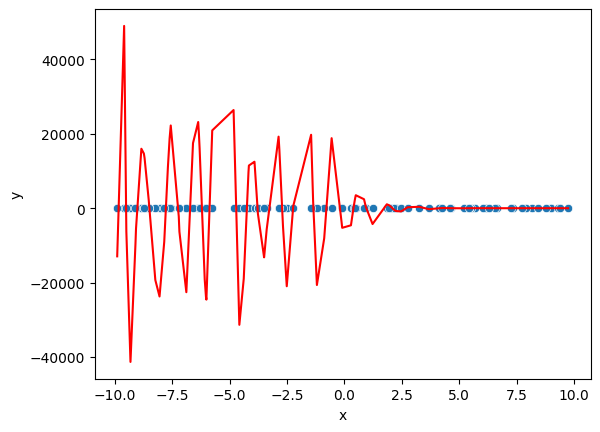

In [276]:
w = ols_gauss_basis_50_fit(data)
print(f'w: {w}')
sns.scatterplot(data=data, x='x', y='y')
sns.lineplot(x=data.x, y=np.matmul(phi, w), color='red')

As we can see this worked horribly. Let's try using ridge regression with lambda = 0.01 instead.

w: [-0.14484326 -0.12995178 -0.08995771 -0.04367598 -0.0135308  -0.00996237
 -0.02482014 -0.04012779 -0.044168   -0.03978471 -0.03856936 -0.04880933
 -0.06858563 -0.0878315  -0.09593316 -0.08900241 -0.07110154 -0.0480901
 -0.0207674   0.01421699  0.05663371  0.09836068  0.12903013  0.14577049
  0.1555038   0.16635003  0.17742779  0.17874217  0.1612259   0.12531288
  0.07985563  0.03605943  0.00416883 -0.00846419 -0.00254825  0.00952869
  0.01115692 -0.00273779 -0.01837763 -0.01480142  0.016183    0.06202928
  0.10008847  0.11479692  0.10660445  0.08885854  0.07806013  0.08392149
  0.10372783  0.12418722]


<Axes: xlabel='x', ylabel='y'>

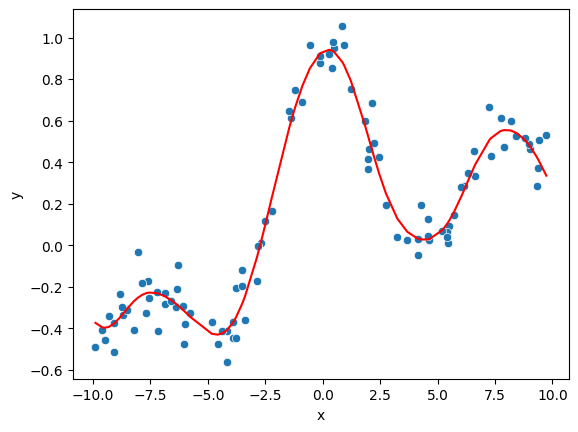

In [274]:
w = ridge_gauss_basis_50_fit(data, 0.01)
print(f'w: {w}')
sns.scatterplot(data=data, x='x', y='y')
sns.lineplot(x=data.x, y=np.matmul(phi, w), color='red')

This worked a lot better. Below I'll plot ridge regression's output for multiple different values of lambda.

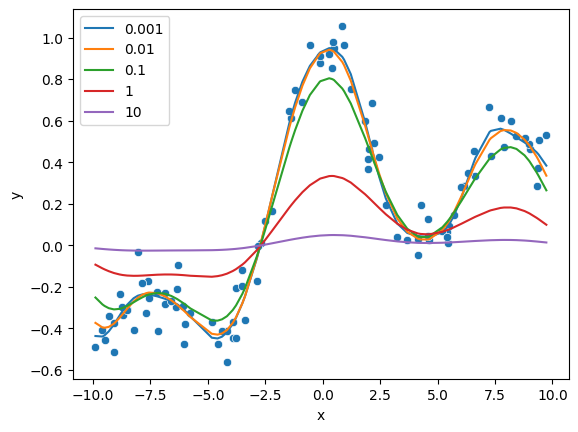

In [273]:
lambdas = [0.001, 0.01, 0.1, 1, 10]
W = [ridge_gauss_basis_50_fit(data, lambd) for lambd in lambdas]
# colors = 
# W = pd.DataFrame(W).T
# W.columns = lambdas

sns.scatterplot(data=data, x='x', y='y')
for i in range(len(W)):
    w = W[i]
    sns.lineplot(x=data.x, y=np.matmul(phi, w), label=lambdas[i])

plt.legend()
plt.show()

As lambda increases the cost of a large weight vector increases so more generalizable solutions are favored. This also means that as lambda approaches 0 the prediction function becomes OLS regression (overfits the data).